## Outline

* Why vectorisation
* Vectorisation examples
* Scalar class - recap
* Class with vectorised weights 
* Class with vectorised weights and inputs
* Exercise

## Setup

In [24]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook 
import seaborn as sns
import imageio
import time
from IPython.display import HTML


from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

In [25]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

In [26]:
np.random.seed(0)

## Testing vectorisation

In [27]:
N = 100
M = 200
a = np.random.randn(N, M)
b = np.random.randn(N, M)
c = np.zeros((N, M))

In [28]:
%%time
for i in range(N):
  for j in range(M):
    c[i, j] = a[i, j] + b[i, j]

Wall time: 56 ms


In [29]:
%%time
c = a + b

Wall time: 133 ms


In [30]:
%%time
for i in range(N):
  for j in range(M):
    c[i, j] = np.sin(a[i, j] + 1)

Wall time: 104 ms


In [31]:
%%time
c = np.sin(a + 1)

Wall time: 4 ms


## Generate data

In [38]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


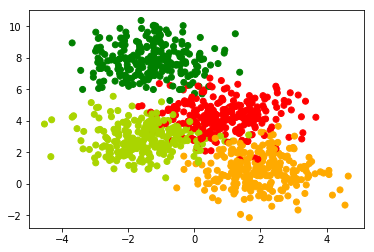

In [39]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

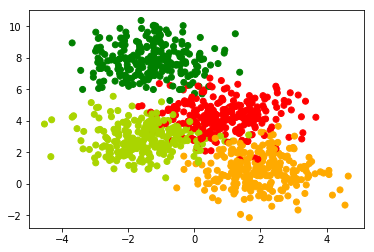

In [40]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

## Multi class classification

In [41]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape, labels.shape)

(750, 2) (250, 2) (1000,)


In [42]:
enc = OneHotEncoder()
# 0 -> (1, 0, 0, 0), 1 -> (0, 1, 0, 0), 2 -> (0, 0, 1, 0), 3 -> (0, 0, 0, 1)
y_OH_train = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
y_OH_val = enc.fit_transform(np.expand_dims(Y_val,1)).toarray()
print(y_OH_train.shape, y_OH_val.shape)

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this 

(750, 4) (250, 4)


In [ ]:
W1 = np.random.randn(2,2)
W2 = np.random.randn(2,4)
print(W1)
print(W2)

## Scalar Version

In [ ]:
class FF_MultiClass_Scalar:
  
  def __init__(self, W1, W2):
    self.w1 = W1[0][0].copy()
    self.w2 = W1[1][0].copy()
    self.w3 = W1[0][1].copy()
    self.w4 = W1[1][1].copy()
    self.w5 = W2[0][0].copy()
    self.w6 = W2[1][0].copy()
    self.w7 = W2[0][1].copy()
    self.w8 = W2[1][1].copy()
    self.w9 = W2[0][2].copy()
    self.w10 = W2[1][2].copy()
    self.w11 = W2[0][3].copy()
    self.w12 = W2[1][3].copy()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
    self.b4 = 0
    self.b5 = 0
    self.b6 = 0
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def forward_pass(self, x):
    # input layer
    self.x1, self.x2 = x
    
    # hidden layer
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    
    # output layer
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.a4 = self.w7*self.h1 + self.w8*self.h2 + self.b4
    self.a5 = self.w9*self.h1 + self.w10*self.h2 + self.b5
    self.a6 = self.w11*self.h1 + self.w12*self.h2 + self.b5
    sum_exps = np.sum([np.exp(self.a3), np.exp(self.a4), np.exp(self.a5), np.exp(self.a6)])
    self.h3 = np.exp(self.a3)/sum_exps
    self.h4 = np.exp(self.a4)/sum_exps
    self.h5 = np.exp(self.a5)/sum_exps
    self.h6 = np.exp(self.a6)/sum_exps
    
    return np.array([self.h3, self.h4, self.h5, self.h6])
  
  def grad(self, x, y):
    self.forward_pass(x)
    self.y1, self.y2, self.y3, self.y4 = y
    
    self.da3 = (self.h3-self.y1)
    self.da4 = (self.h4-self.y2)
    self.da5 = (self.h5-self.y3)
    self.da6 = (self.h6-self.y4)
    
    self.dw5 = self.da3*self.h1
    self.dw6 = self.da3*self.h2
    self.db3 = self.da3
    
    self.dw7 = self.da4*self.h1
    self.dw8 = self.da4*self.h2
    self.db4 = self.da4
    
    self.dw9 = self.da5*self.h1
    self.dw10 = self.da5*self.h2
    self.db5 = self.da5
    
    self.dw11 = self.da6*self.h1
    self.dw12 = self.da6*self.h2
    self.db6 = self.da6
    
    self.dh1 = self.da3*self.w5 + self.da4*self.w7 + self.da5*self.w9 + self.da6*self.w11
    self.dh2 = self.da3*self.w6 + self.da4*self.w8 + self.da5*self.w10 + self.da6*self.w12
    
    self.da1 = self.dh1 * self.h1*(1-self.h1)
    self.da2 = self.dh2 * self.h2*(1-self.h2)
    
    self.dw1 = self.da1*self.x1
    self.dw2 = self.da1*self.x2
    self.db1 = self.da1
    
    self.dw3 = self.da2*self.x1
    self.dw4 = self.da2*self.x2
    self.db2 = self.da2
    
  
  def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False, display_weight=False):
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, dw7, dw8, dw9, dw10, dw11, dw12, db1, db2, db3, db4, db5, db6  = [0]*18
      for x, y in zip(X, Y):
        self.grad(x, y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        dw7 += self.dw7
        dw8 += self.dw8
        dw9 += self.dw9
        dw10 += self.dw10
        dw11 += self.dw11
        dw12 += self.dw12
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
        db4 += self.db4
        db2 += self.db5
        db3 += self.db6
        
      m = X.shape[0]
      self.w1 -= (learning_rate * (dw1 / m))
      self.w2 -= (learning_rate * (dw2 / m))
      self.w3 -= (learning_rate * (dw3 / m))
      self.w4 -= (learning_rate * (dw4 / m))
      self.w5 -= (learning_rate * (dw5 / m))
      self.w6 -= (learning_rate * (dw6 / m))
      self.w7 -= (learning_rate * (dw7 / m))
      self.w8 -= (learning_rate * (dw8 / m))
      self.w9 -= (learning_rate * (dw9 / m))
      self.w10 -= (learning_rate * (dw10 / m))
      self.w11 -= (learning_rate * (dw11 / m))
      self.w12 -= (learning_rate * (dw12 / m))
      self.b1 -= (learning_rate * (db1 / m))
      self.b2 -= (learning_rate * (db2 / m))
      self.b3 -= (learning_rate * (db3 / m))
      self.b4 -= (learning_rate * (db4 / m))
      self.b5 -= (learning_rate * (db5 / m))
      self.b6 -= (learning_rate * (db6 / m))
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = log_loss(np.argmax(Y, axis=1), Y_pred)
    
    if display_loss:
      Wt1 = [[self.w1, self.w3], [self.w2, self.w4]]
      Wt2 = [[self.w5, self.w6, self.w7, self.w8], [self.w9, self.w10, self.w11, self.w12]]
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Log Loss')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

## Weight Vectorised Version

In [ ]:
class FF_MultiClass_WeightVectorised:
  
  def __init__(self, W1, W2):
    self.W1 = W1.copy()
    self.W2 = W2.copy()
    self.B1 = np.zeros((1,2))
    self.B2 = np.zeros((1,4))
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def softmax(self, x):
    exps = np.exp(x)
    return exps / np.sum(exps)
  
  def forward_pass(self, x):
    x = x.reshape(1, -1) # (1, 2)
    self.A1 = np.matmul(x,self.W1) + self.B1  # (1, 2) * (2, 2) -> (1, 2)
    self.H1 = self.sigmoid(self.A1) # (1, 2)
    self.A2 = np.matmul(self.H1, self.W2) + self.B2 # (1, 2) * (2, 4) -> (1, 4) 
    self.H2 = self.softmax(self.A2) # (1, 4)
    return self.H2
    
  def grad_sigmoid(self, x):
    return x*(1-x) 
  
  def grad(self, x, y):
    self.forward_pass(x)
    x = x.reshape(1, -1) # (1, 2)
    y = y.reshape(1, -1) # (1, 4)
    
    self.dA2 = self.H2 - y # (1, 4) 
    
    self.dW2 = np.matmul(self.H1.T, self.dA2) # (2, 1) * (1, 4) -> (2, 4)
    self.dB2 = self.dA2 # (1, 4)
    self.dH1 = np.matmul(self.dA2, self.W2.T) # (1, 4) * (4, 2) -> (1, 2)
    self.dA1 = np.multiply(self.dH1, self.grad_sigmoid(self.H1)) # -> (1, 2)
    
    self.dW1 = np.matmul(x.T, self.dA1) # (2, 1) * (1, 2) -> (2, 2)
    self.dB1 = self.dA1 # (1, 2)

  
  def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False):
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dW1 = np.zeros((2,2))
      dW2 = np.zeros((2,4))
      dB1 = np.zeros((1,2))
      dB2 = np.zeros((1,4))
      for x, y in zip(X, Y):
        self.grad(x, y)
        dW1 += self.dW1
        dW2 += self.dW2
        dB1 += self.dB1
        dB2 += self.dB2  
        
      m = X.shape[0]
      self.W2 -= learning_rate * (dW2/m)
      self.B2 -= learning_rate * (dB2/m)
      self.W1 -= learning_rate * (dW1/m)
      self.B1 -= learning_rate * (dB1/m)

      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = log_loss(np.argmax(Y, axis=1), Y_pred)
        
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Log Loss')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred).squeeze()

## Input + Weight Vectorised Version

In [117]:
class FF_MultiClass_InputWeightVectorised:
  
  def __init__(self, W1, W2):
    self.W1 = W1.copy()
    self.W2 = W2.copy()
    self.B1 = np.zeros((1,2))
    self.B2 = np.zeros((1,4))
  
  def sigmoid(self, X):
    return 1.0/(1.0 + np.exp(-X))
  
  def softmax(self, X):
    exps = np.exp(X)
    return exps / np.sum(exps, axis=1).reshape(-1,1)
  
  def forward_pass(self, X):
    self.A1 = np.matmul(X,self.W1) + self.B1 # (N, 2) * (2, 2) -> (N, 2)
    self.H1 = self.sigmoid(self.A1) # (N, 2)
    self.A2 = np.matmul(self.H1, self.W2) + self.B2 # (N, 2) * (2, 4) -> (N, 4)
    self.H2 = self.softmax(self.A2) # (N, 4)
    return self.H2
    
  def grad_sigmoid(self, X):
    return X*(1-X) 
  
  def grad(self, X, Y):
    X = X.reshape(1, -1) # (1, 2)
    Y = Y.reshape(1, -1) # (1, 4)
    self.forward_pass(X)
    m = X.shape[0]
    
    self.dA2 = self.H2 - Y # (N, 4) - (N, 4) -> (N, 4)
    
    self.dW2 = np.matmul(self.H1.T, self.dA2) # (2, N) * (N, 4) -> (2, 4)
    self.dB2 = np.sum(self.dA2, axis=0).reshape(1, -1) # (N, 4) -> (1, 4)
    self.dH1 = np.matmul(self.dA2, self.W2.T) # (N, 4) * (4, 2) -> (N, 2)
    self.dA1 = np.multiply(self.dH1, self.grad_sigmoid(self.H1)) # (N, 2) .* (N, 2) -> (N, 2)
    
    self.dW1 = np.matmul(X.T, self.dA1) # (2, N) * (N, 2) -> (2, 2)
    self.dB1 = np.sum(self.dA1, axis=0).reshape(1, -1) # (N, 2) -> (1, 2)

      
  def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False):
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      self.grad(X, Y) # X -> (N, 2), Y -> (N, 4)
        
      m = X.shape[0]
      self.W2 -= learning_rate * (self.dW2/m)
      self.B2 -= learning_rate * (self.dB2/m)
      self.W1 -= learning_rate * (self.dW1/m)
      self.B1 -= learning_rate * (self.dB1/m)

      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = log_loss(np.argmax(Y, axis=1), Y_pred)
    
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Log Loss')
      plt.show()
      
  
  def predict(self, X):
    Y_pred = self.forward_pass(X)
    return np.array(Y_pred).squeeze()

In [118]:
models_init = [FF_MultiClass_Scalar(W1, W2), FF_MultiClass_WeightVectorised(W1, W2),FF_MultiClass_InputWeightVectorised(W1, W2)]
models = []
for idx, model in enumerate(models_init, start=1):
  tic = time.time()
  ffsn_multi_specific = model
  ffsn_multi_specific.fit(X_train,y_OH_train,epochs=2000,learning_rate=.5,display_loss=True)
  models.append(ffsn_multi_specific)
  toc = time.time()
  print("Time taken by model {}: {}".format(idx, toc-tic))

KeyboardInterrupt: 

In [ ]:
for idx, model in enumerate(models, start=1):
  Y_pred_train = model.predict(X_train)
  Y_pred_train = np.argmax(Y_pred_train,1)

  Y_pred_val = model.predict(X_val)
  Y_pred_val = np.argmax(Y_pred_val,1)

  accuracy_train = accuracy_score(Y_pred_train, Y_train)
  accuracy_val = accuracy_score(Y_pred_val, Y_val)
  
  print("Model {}".format(idx))
  print("Training accuracy", round(accuracy_train, 2))
  print("Validation accuracy", round(accuracy_val, 2))

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_train, cmap=my_cmap, s=15*(np.abs(np.sign(Y_pred_train-Y_train))+.1))
plt.show()

## Exercises

1. Replicate this vectorisation for the simple first network we saw earlier

2. Extend this vectorisation for the generic feed forward class that we wrote with number of hidden layers and neurons per hidden layer as inputs

3. Understand how the speedup changes as you increase the hidden layers - Keep the number of neurons per layer constant and increase the layers to see how the speed up changes

In [49]:
y_OH_train

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

In [164]:
class FF_MultiClass_customized:
  
  def __init__(self, n_inputs,n_outputs, hidden_sizes):
    self.nx = n_inputs
    self.ny = n_outputs
    self.nh = len(hidden_sizes)
    self.sizes = [self.nx] + hidden_sizes +[self.ny]
    print("in init")
    self.W = {}
    self.B = {}
    for i in range(self.nh+1):
      self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
      #print(self.W[i+1])
      self.B[i+1] = np.zeros((1, self.sizes[i+1]))
  
  def sigmoid(self, X):
    return 1.0/(1.0 + np.exp(-X))
  
  def softmax(self, X):
    exps = np.exp(X)
    return exps / np.sum(exps, axis=1).reshape(-1,1)
  
  def forward_pass(self, X):
    self.A = {}
    self.H = {}
   # print(X.shape)
    self.H[0] = X
    #X.reshape(1,-1)
    #print(X.shape)
   # print(self.W[1].shape)
    #self.A[1] = np.matmul(self.H[0],self.W[1]) + self.B[1]
    print(self.H[0].shape)
    #self.H[1] = self.sigmoid(self.A[1])
    for i in range(self.nh):
      self.A[i+1] = np.matmul(X, self.W[i+1]) + self.B[i+1]
      self.H[i+1] = self.sigmoid(self.A[i+1])
      #print(i+1)
    self.A[self.nh+1]=np.matmul(self.H[self.nh], self.W[self.nh+1]) + self.B[self.nh+1]
    self.H[self.nh+1] = self.softmax(self.A[self.nh+1])
   # print(self.H[self.nh+1].shape)
    return self.H[self.nh+1]
    
  def grad_sigmoid(self, X):
    return X*(1-X) 
  
  def grad(self, X, Y):
    self.forward_pass(X)

    m = X.shape[0]
    #print(X.shape)
   # print(Y.shape)
    self.dW = {}
    self.dB = {}
    self.dH = {}
    self.dA = {}
    L = self.nh +1
    self.dA[L] = (self.H[L] - Y)
    (self.H[L])
    for k in range(L, 0, -1):
      
      #print(self.H[k-1].T.shape)
      #print(self.dA[k].shape)
     # print(k)
      self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
      self.dB[k] =np.sum(self.dA[k], axis=0).reshape(1, -1)
      self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
      self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))
    
    
    
    

      
  def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False):
      
    if display_loss:
      loss = {}
    
   
    for e in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
     
      
       # print(dW[i+1])
      self.grad(X, Y)
        
      m = X.shape[0]
      for i in range(self.nh+1):
        self.W[i+1] -= learning_rate * self.dW[i+1] / m
        self.B[i+1] -= learning_rate * self.dB[i+1] / m
        print(self.W[i+1])

      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = log_loss(np.argmax(Y, axis=1), Y_pred)
    
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Log Loss')
      plt.show()
      
  
  def predict(self, X):
    Y_pred = self.forward_pass(X)
    return np.array(Y_pred).squeeze()

In [166]:
obj=FF_MultiClass_customized(2,4,[2])
obj.fit(X_train,y_OH_train,epochs=2000,learning_rate=.5,display_loss=True)

in init


(750, 2)
[[ 0.8080463  -0.10534927]
 [ 1.05507086  0.03786249]]
[[-1.205434    0.72732772 -0.34367808  0.55613459]
 [ 0.4642845  -0.2760269   1.01818535 -0.67788723]]
(750, 2)
(750, 2)
[[ 8.28419762e-01 -1.22925637e-01]
 [ 1.03328510e+00 -1.89666443e-04]]
[[-1.12902352  0.67247547 -0.36893467  0.55983295]
 [ 0.50066294 -0.31378355  1.01379646 -0.67212013]]
(750, 2)
(750, 2)
[[ 0.84800832 -0.14086951]
 [ 1.01207724 -0.03026564]]
[[-1.0618872   0.63031908 -0.39022183  0.55614018]
 [ 0.52816816 -0.3403859   1.01457026 -0.6737968 ]]
(750, 2)
(750, 2)
[[ 0.86695868 -0.15937175]
 [ 0.99138467 -0.05594386]]
[[-1.00361055  0.59729123 -0.4087525   0.54942206]
 [ 0.54824512 -0.35949077  1.01918348 -0.67938211]]
(750, 2)
(750, 2)
[[ 0.8853921  -0.17848804]
 [ 0.97110316 -0.07960867]]
[[-0.95346499  0.57104247 -0.42530514  0.54207789]
 [ 0.56201708 -0.37328541  1.02684893 -0.68702487]]
(750, 2)
(750, 2)
[[ 0.90341755 -0.19832397]
 [ 0.9510802  -0.10207711]]
[[-0.91045821  0.54992245 -0.44035928  0

 [-0.04382299 -0.42249986  1.95482798 -0.9599494 ]]
(750, 2)
(750, 2)
[[ 1.37851871 -1.03193396]
 [ 0.54179592 -0.51800386]]
[[-0.20111921  0.60092381 -1.22895374  0.56349937]
 [-0.05982813 -0.42407892  1.9751352  -0.96267243]]
(750, 2)
(750, 2)
[[ 1.38522073 -1.04366707]
 [ 0.54209718 -0.52355964]]
[[-0.18834897  0.60621573 -1.24611732  0.56260079]
 [-0.07563569 -0.42561134  1.99512861 -0.96532587]]
(750, 2)
(750, 2)
[[ 1.39183728 -1.05501571]
 [ 0.5423901  -0.52902314]]
[[-0.17575154  0.6115156  -1.26303136  0.56161754]
 [-0.09124561 -0.42709194  2.01480921 -0.96791594]]
(750, 2)
(750, 2)
[[ 1.39836853 -1.06598705]
 [ 0.54266597 -0.53439714]]
[[-0.16332411  0.61682424 -1.27969949  0.56054958]
 [-0.10665827 -0.4285159   2.03417854 -0.97044864]]
(750, 2)
(750, 2)
[[ 1.40481486 -1.07658827]
 [ 0.54291669 -0.53968447]]
[[-0.15106349  0.62214265 -1.29612553  0.55939661]
 [-0.1218744  -0.42987874  2.05323865 -0.97292979]]
(750, 2)
(750, 2)
[[ 1.41117681 -1.0868266 ]
 [ 0.54313467 -0.544887

 [ 0.40641531 -0.73135062]]
[[ 0.28250138  0.91113622 -1.83101347  0.3717261 ]
 [-0.61151105 -0.38979275  2.62112915 -1.09126963]]
(750, 2)
(750, 2)
[[ 1.64423512 -1.26530622]
 [ 0.39294727 -0.73672345]]
[[ 0.29353708  0.9235839  -1.84191412  0.35914337]
 [-0.62030784 -0.38553758  2.6300952  -1.09569405]]
(750, 2)
(750, 2)
[[ 1.65130495 -1.26502765]
 [ 0.37826848 -0.74219535]]
[[ 0.30484399  0.93678901 -1.85284515  0.34556239]
 [-0.62900094 -0.38108382  2.63888543 -1.10024495]]
(750, 2)
(750, 2)
[[ 1.65865356 -1.26464673]
 [ 0.36230309 -0.74775413]]
[[ 0.31645244  0.95083053 -1.86381481  0.33088207]
 [-0.63759307 -0.37643207  2.64750468 -1.10492381]]
(750, 2)
(750, 2)
[[ 1.66629418 -1.26418594]
 [ 0.34499025 -0.75338087]]
[[ 0.32839234  0.9657912  -1.87482932  0.31499601]
 [-0.64608739 -0.37158457  2.65595917 -1.10973149]]
(750, 2)
(750, 2)
[[ 1.67423437 -1.26367108]
 [ 0.32629248 -0.75904876]]
[[ 0.34069139  0.98175491 -1.88589183  0.29779577]
 [-0.65448753 -0.36654548  2.66425688 -1.

(750, 2)
[[ 2.2638342  -0.97993258]
 [-0.3818485  -0.84188391]]
[[ 1.04630797  2.84979057 -2.43322681 -1.7285215 ]
 [-1.31363341  0.21280823  3.46577056 -1.83638966]]
(750, 2)
(750, 2)
[[ 2.26607439 -0.97172723]
 [-0.38216786 -0.84216384]]
[[ 1.0529984   2.86171787 -2.43829267 -1.74207337]
 [-1.32075455  0.22249734  3.47382777 -1.84701483]]
(750, 2)
(750, 2)
[[ 2.26824893 -0.9635051 ]
 [-0.38245841 -0.84245867]]
[[ 1.05975205  2.87347115 -2.44339588 -1.7554771 ]
 [-1.32786148  0.23227871  3.48182462 -1.85768613]]
(750, 2)
(750, 2)
[[ 2.27035939 -0.95527382]
 [-0.38272114 -0.84277013]]
[[ 1.06656969  2.88505191 -2.44853702 -1.76873435]
 [-1.33495366  0.24215114  3.48976117 -1.86840293]]
(750, 2)
(750, 2)
[[ 2.2724073  -0.94704125]
 [-0.38295701 -0.84309993]]
[[ 1.07345194  2.89646167 -2.45371659 -1.78184678]
 [-1.34203052  0.25211332  3.4976375  -1.87916458]]
(750, 2)
(750, 2)
[[ 2.27439419 -0.93881544]
 [-0.38316698 -0.84344984]]
[[ 1.0803993   2.907702   -2.45893504 -1.79481602]
 [-1.

 [-1.61848069  0.72263125  3.78050984 -2.35610467]]
(750, 2)
(750, 2)
[[ 2.31918541 -0.68741097]
 [-0.3813636  -0.89121442]]
[[ 1.41443546  3.2586258  -2.70553007 -2.23318095]
 [-1.62445954  0.73428907  3.78633408 -2.36760789]]
(750, 2)
(750, 2)
[[ 2.31960862 -0.68444624]
 [-0.38132096 -0.89315424]]
[[ 1.42266056  3.26498782 -2.71165384 -2.24164432]
 [-1.63040781  0.74593536  3.79212671 -2.37909855]]
(750, 2)
(750, 2)
[[ 2.32000956 -0.68159563]
 [-0.38128515 -0.89511871]]
[[ 1.43086401  3.27129422 -2.71776845 -2.25003955]
 [-1.63632537  0.75756849  3.79788825 -2.39057565]]
(750, 2)
(750, 2)
[[ 2.32038846 -0.67885522]
 [-0.38125626 -0.89710663]]
[[ 1.43904428  3.2775467  -2.7238728  -2.25836795]
 [-1.64221214  0.76918689  3.80361921 -2.40203824]]
(750, 2)
(750, 2)
[[ 2.32074556 -0.67622114]
 [-0.38123432 -0.89911681]]
[[ 1.44719995  3.2837469  -2.72996585 -2.26663077]
 [-1.64806799  0.78078904  3.80932009 -2.41348542]]
(750, 2)
(750, 2)
[[ 2.3210811  -0.67368956]
 [-0.38121938 -0.901148

 [-0.3856976  -0.99186436]]
[[ 1.7579364   3.51097295 -2.96761692 -2.5669422 ]
 [-1.86522657  1.24047753  4.02586711 -2.87256235]]
(750, 2)
(750, 2)
[[ 2.31777532 -0.62291009]
 [-0.38589815 -0.99407996]]
[[ 1.76448738  3.51581588 -2.97274881 -2.57320422]
 [-1.86971001  1.25058677  4.03054798 -2.88286903]]
(750, 2)
(750, 2)
[[ 2.31732209 -0.62244239]
 [-0.38610153 -0.99629036]]
[[ 1.77099849  3.52063963 -2.977855   -2.5794329 ]
 [-1.87416236  1.26065323  4.03520923 -2.89314438]]
(750, 2)
(750, 2)
[[ 2.3168531  -0.62199267]
 [-0.38630763 -0.99849535]]
[[ 1.77746982  3.52544457 -2.98293552 -2.58562864]
 [-1.87858373  1.27067684  4.03985098 -2.90338837]]
(750, 2)
(750, 2)
[[ 2.31636844 -0.62156028]
 [-0.38651638 -1.00069472]]
[[ 1.7839015   3.53023103 -2.98799043 -2.59179187]
 [-1.88297425  1.28065757  4.04447339 -2.91360098]]
(750, 2)
(750, 2)
[[ 2.31586821 -0.6211446 ]
 [-0.38672769 -1.0028883 ]]
[[ 1.79029366  3.53499935 -2.99301979 -2.59792299]
 [-1.88733404  1.29059536  4.04907659 -2.

 [-0.4085376  -1.16475259]]
[[ 2.21972038  3.90919774 -3.34868126 -3.04588663]
 [-2.16851898  2.009397    4.39296975 -3.70529204]]
(750, 2)
(750, 2)
[[ 2.22110068 -0.61339271]
 [-0.40877306 -1.16622711]]
[[ 2.22335346  3.91311937 -3.35190525 -3.05021734]
 [-2.17076047  2.01601999  4.39631751 -3.7130213 ]]
(750, 2)
(750, 2)
[[ 2.21959852 -0.61342854]
 [-0.40900759 -1.16769413]]
[[ 2.22696416  3.91703621 -3.35511455 -3.05453559]
 [-2.17298497  2.02261385  4.3996552  -3.72072835]]
(750, 2)
(750, 2)
[[ 2.21808927 -0.61346501]
 [-0.40924118 -1.16915367]]
[[ 2.23055266  3.92094832 -3.35830927 -3.05884147]
 [-2.1751926   2.02917873  4.40298289 -3.7284133 ]]
(750, 2)
(750, 2)
[[ 2.21657302 -0.61350209]
 [-0.40947383 -1.17060576]]
[[ 2.23411911  3.92485574 -3.36148951 -3.06313511]
 [-2.1773835   2.03571484  4.40630066 -3.73607627]]
(750, 2)
(750, 2)
[[ 2.21504984 -0.61353975]
 [-0.40970551 -1.17205046]]
[[ 2.23766368  3.92875853 -3.36465538 -3.06741661]
 [-2.1795578   2.04222233  4.40960857 -3.

 [-0.42568639 -1.27426329]]
[[ 2.48021119  4.25872694 -3.59778373 -3.40680417]
 [-2.31867409  2.52120277  4.66862699 -4.34259994]]
(750, 2)
(750, 2)
[[ 2.06065277 -0.61745229]
 [-0.42581551 -1.27518464]]
[[ 2.48233459  4.26236241 -3.60001999 -3.41032678]
 [-2.31978302  2.52576157  4.6712668  -4.34868963]]
(750, 2)
(750, 2)
[[ 2.05879719 -0.61749302]
 [-0.42594348 -1.27610146]]
[[ 2.48444668  4.26599597 -3.60224893 -3.41384348]
 [-2.3208836   2.53030397  4.67390091 -4.35476556]]
(750, 2)
(750, 2)
[[ 2.05694073 -0.6175336 ]
 [-0.4260703  -1.27701377]]
[[ 2.48654754  4.26962762 -3.6044706  -3.41735432]
 [-2.32197588  2.53483006  4.67652934 -4.36082779]]
(750, 2)
(750, 2)
[[ 2.05508346 -0.61757402]
 [-0.42619598 -1.2779216 ]]
[[ 2.48863723  4.27325738 -3.60668505 -3.42085933]
 [-2.32305993  2.53933992  4.67915212 -4.36687639]]
(750, 2)
(750, 2)
[[ 2.05322544 -0.6176143 ]
 [-0.4263205  -1.27882498]]
[[ 2.49071586  4.27688526 -3.60889234 -3.42435855]
 [-2.3241358   2.54383367  4.68176929 -4.

 [-0.4332435  -1.34343102]]
[[ 2.63801626  4.59016073 -3.78033617 -3.71349058]
 [-2.39264074  2.88579421  4.89298001 -4.85757776]]
(750, 2)
(750, 2)
[[ 1.89044366 -0.62064117]
 [-0.43328212 -1.34402102]]
[[ 2.63935918  4.59366397 -3.78207529 -3.71659762]
 [-2.39317652  2.88916588  4.8951903  -4.86262393]]
(750, 2)
(750, 2)
[[ 1.88869751 -0.62066979]
 [-0.43331998 -1.34460826]]
[[ 2.64069605  4.5971661  -3.78381064 -3.71970128]
 [-2.39370785  2.89252778  4.89739682 -4.86766103]]
(750, 2)
(750, 2)
[[ 1.88695418 -0.6206983 ]
 [-0.43335709 -1.34519276]]
[[ 2.6420269   4.60066714 -3.78554225 -3.72280156]
 [-2.39423477  2.89587997  4.8995996  -4.87268909]]
(750, 2)
(750, 2)
[[ 1.88521371 -0.62072672]
 [-0.43339344 -1.34577453]]
[[ 2.64335178  4.60416708 -3.78727013 -3.72589849]
 [-2.39475729  2.8992225   4.90179865 -4.87770814]]
(750, 2)
(750, 2)
[[ 1.88347611 -0.62075504]
 [-0.43342905 -1.34635359]]
[[ 2.6446707   4.60766593 -3.78899432 -3.72899208]
 [-2.39527545  2.90255542  4.90399397 -4.

 [-0.43417726 -1.38807151]]
[[ 2.74118292  4.91148939 -3.92866871 -3.98965337]
 [-2.42644511  3.16333429  5.08398718 -5.29232064]]
(750, 2)
(750, 2)
[[ 1.74255716 -0.62293484]
 [-0.43416434 -1.38845431]]
[[ 2.74209293  4.9148962  -3.93014135 -3.99249754]
 [-2.42666075  3.16597866  5.08589602 -5.2966582 ]]
(750, 2)
(750, 2)
[[ 1.74114402 -0.62295592]
 [-0.43415106 -1.38883533]]
[[ 2.7429994   4.91830196 -3.93161182 -3.99533931]
 [-2.42687375  3.16861684  5.08780204 -5.30098941]]
(750, 2)
(750, 2)
[[ 1.73973484 -0.62297692]
 [-0.43413741 -1.38921457]]
[[ 2.74390237  4.92170667 -3.93308013 -3.99817867]
 [-2.42708413  3.17124886  5.08970527 -5.30531427]]
(750, 2)
(750, 2)
[[ 1.73832961 -0.62299786]
 [-0.43412341 -1.38959205]]
[[ 2.74480184  4.92511033 -3.9345463  -4.00101564]
 [-2.42729191  3.17387475  5.09160571 -5.30963283]]
(750, 2)
(750, 2)
[[ 1.73692834 -0.62301872]
 [-0.43410905 -1.38996776]]
[[ 2.74569783  4.92851295 -3.93601032 -4.00385023]
 [-2.42749709  3.17649455  5.09350336 -5.

 [-0.43180652 -1.41693261]]
[[ 2.81275336  5.22362763 -4.05747202 -4.24455873]
 [-2.43676535  3.38603745  5.25041769 -5.67113407]]
(750, 2)
(750, 2)
[[ 1.62761359 -0.62460188]
 [-0.43177192 -1.41717775]]
[[ 2.81339888  5.22692959 -4.05877758 -4.24720066]
 [-2.43678445  3.38820886  5.25209492 -5.67496361]]
(750, 2)
(750, 2)
[[ 1.62654921 -0.62461663]
 [-0.4317372  -1.41742167]]
[[ 2.81404212  5.23023034 -4.06008162 -4.24984061]
 [-2.43680189  3.39037614  5.25376995 -5.67878847]]
(750, 2)
(750, 2)
[[ 1.62548819 -0.62463133]
 [-0.43170235 -1.41766437]]
[[ 2.8146831   5.23352986 -4.06138415 -4.25247858]
 [-2.43681767  3.39253928  5.25544278 -5.68260867]]
(750, 2)
(750, 2)
[[ 1.62443054 -0.62464595]
 [-0.43166738 -1.41790587]]
[[ 2.8153218   5.23682817 -4.06268517 -4.25511456]
 [-2.43683179  3.39469831  5.25711343 -5.68642423]]
(750, 2)
(750, 2)
[[ 1.62337623 -0.62466051]
 [-0.43163229 -1.41814616]]
[[ 2.81595826  5.24012524 -4.0639847  -4.25774857]
 [-2.43684428  3.39685325  5.2587819  -5.

 [-0.42823157 -1.43507987]]
[[ 2.86410484  5.5252709  -4.17286991 -4.4821556 ]
 [-2.43235968  3.57216639  5.39770309 -6.00895408]]
(750, 2)
(750, 2)
[[ 1.54164237 -0.62569759]
 [-0.42819085 -1.43522957]]
[[ 2.86457229  5.52845241 -4.17404899 -4.48462547]
 [-2.43225405  3.57401315  5.39919879 -6.01240217]]
(750, 2)
(750, 2)
[[ 1.54084523 -0.62570644]
 [-0.42815011 -1.43537841]]
[[ 2.86503814  5.53163257 -4.17522684 -4.48709363]
 [-2.43214737  3.57585699  5.40069277 -6.01584667]]
(750, 2)
(750, 2)
[[ 1.54005046 -0.62571522]
 [-0.42810935 -1.43552641]]
[[ 2.86550239  5.53481136 -4.17640346 -4.48956006]
 [-2.43203965  3.57769792  5.40218504 -6.01928758]]
(750, 2)
(750, 2)
[[ 1.53925806 -0.62572394]
 [-0.42806857 -1.43567356]]
[[ 2.86596506  5.53798879 -4.17757885 -4.49202477]
 [-2.4319309   3.57953594  5.40367561 -6.02272493]]
(750, 2)
(750, 2)
[[ 1.53846802 -0.62573261]
 [-0.42802778 -1.43581985]]
[[ 2.86642615  5.54116486 -4.17875301 -4.49448777]
 [-2.43182111  3.58137107  5.40516446 -6.

 [-0.42442849 -1.44571946]]
[[ 2.90141505  5.81523493 -4.2775031  -4.70479665]
 [-2.41870564  3.73260845  5.53002568 -6.31537277]]
(750, 2)
(750, 2)
[[ 1.47649991 -0.62627784]
 [-0.42438805 -1.44580167]]
[[ 2.90175546  5.81828695 -4.27857566 -4.70711651]
 [-2.41852348  3.73422148  5.53138007 -6.31852235]]
(750, 2)
(750, 2)
[[ 1.47588624 -0.62628157]
 [-0.42434763 -1.44588327]]
[[ 2.90209471  5.82133755 -4.27964716 -4.70943487]
 [-2.41834071  3.73583237  5.53273312 -6.32166906]]
(750, 2)
(750, 2)
[[ 1.47527418 -0.62628525]
 [-0.42430724 -1.44596427]]
[[ 2.9024328   5.82438674 -4.28071759 -4.71175172]
 [-2.41815732  3.73744111  5.53408485 -6.32481292]]
(750, 2)
(750, 2)
[[ 1.47466373 -0.62628888]
 [-0.42426686 -1.44604466]]
[[ 2.90276975  5.82743451 -4.28178696 -4.71406707]
 [-2.41797332  3.73904772  5.53543525 -6.32795392]]
(750, 2)
(750, 2)
[[ 1.47405487 -0.62629246]
 [-0.4242265  -1.44612445]]
[[ 2.90310556  5.83048087 -4.28285527 -4.71638093]
 [-2.41778872  3.74065219  5.53678432 -6.

 [-0.42078206 -1.4510265 ]]
[[ 2.92861153  6.09300769 -4.37289393 -4.91437506]
 [-2.39958409  3.87420794  5.65072172 -6.59678986]]
(750, 2)
(750, 2)
[[ 1.42556186 -0.62642263]
 [-0.42074435 -1.45106059]]
[[ 2.92886     6.09592788 -4.37387389 -4.91656376]
 [-2.39935927  3.87564613  5.65196635 -6.59969749]]
(750, 2)
(750, 2)
[[ 1.42507387 -0.62642209]
 [-0.42070668 -1.45109426]]
[[ 2.92910763  6.09884666 -4.37485291 -4.91875115]
 [-2.39913414  3.87708269  5.65320994 -6.60260277]]
(750, 2)
(750, 2)
[[ 1.42458701 -0.6264215 ]
 [-0.42066904 -1.45112749]]
[[ 2.92935443  6.10176402 -4.37583101 -4.92093721]
 [-2.3989087   3.8785176   5.6544525  -6.60550569]]
(750, 2)
(750, 2)
[[ 1.42410127 -0.62642087]
 [-0.42063144 -1.45116028]]
[[ 2.92960041  6.10467997 -4.37680818 -4.92312197]
 [-2.39868294  3.8799509   5.65569403 -6.60840626]]
(750, 2)
(750, 2)
[[ 1.42361664 -0.6264202 ]
 [-0.42059388 -1.45119265]]
[[ 2.92984556  6.10759451 -4.37778443 -4.92530541]
 [-2.39845689  3.88138257  5.65693452 -6.

 [-0.41744041 -1.4525265 ]]
[[ 2.94851803  6.35857398 -4.46022369 -5.11251808]
 [-2.37765442  4.00149834  5.76236839 -6.85765659]]
(750, 2)
(750, 2)
[[ 1.38450323 -0.6261982 ]
 [-0.41740639 -1.45252621]]
[[ 2.94870075  6.36136398 -4.46112275 -5.11459175]
 [-2.37741071  4.00280164  5.76352731 -6.86036252]]
(750, 2)
(750, 2)
[[ 1.38410438 -0.62619395]
 [-0.4173724  -1.45252561]]
[[ 2.94888288  6.3641526  -4.46202099 -5.11666425]
 [-2.37716689  4.00410366  5.76468542 -6.86306646]]
(750, 2)
(750, 2)
[[ 1.38370634 -0.62618966]
 [-0.41733846 -1.45252471]]
[[ 2.94906442  6.36693984 -4.46291843 -5.1187356 ]
 [-2.37692298  4.00540441  5.76584271 -6.86576842]]
(750, 2)
(750, 2)
[[ 1.38330911 -0.62618533]
 [-0.41730457 -1.45252349]]
[[ 2.94924538  6.36972569 -4.46381505 -5.12080579]
 [-2.37667897  4.00670387  5.7669992  -6.86846838]]
(750, 2)
(750, 2)
[[ 1.38291269 -0.62618096]
 [-0.41727071 -1.45252197]]
[[ 2.94942576  6.37251016 -4.46471086 -5.12287483]
 [-2.37643486  4.00800207  5.76815488 -6.

 [-0.41445946 -1.45130685]]
[[ 2.96327196  6.61219292 -4.54051086 -5.30060379]
 [-2.35477335  4.11760867  5.86692036 -7.10119996]]
(750, 2)
(750, 2)
[[ 1.35056675 -0.62564433]
 [-0.41442944 -1.45128203]]
[[ 2.96340895  6.61485647 -4.54133924 -5.30257594]
 [-2.35452722  4.11880514  5.86801177 -7.10373397]]
(750, 2)
(750, 2)
[[ 1.35023326 -0.62563667]
 [-0.41439947 -1.45125699]]
[[ 2.96354553  6.61751869 -4.54216692 -5.30454707]
 [-2.35428114  4.12000059  5.86910253 -7.10626626]]
(750, 2)
(750, 2)
[[ 1.34990038 -0.62562897]
 [-0.41436954 -1.45123173]]
[[ 2.96368172  6.62017957 -4.54299388 -5.30651717]
 [-2.3540351   4.12119501  5.87019266 -7.10879685]]
(750, 2)
(750, 2)
[[ 1.3495681  -0.62562124]
 [-0.41433965 -1.45120624]]
[[ 2.96381751  6.62283912 -4.54382014 -5.30848625]
 [-2.3537891   4.12238841  5.87128214 -7.11132572]]
(750, 2)
(750, 2)
[[ 1.34923643 -0.62561347]
 [-0.41430981 -1.45118054]]
[[ 2.9639529   6.62549733 -4.54464569 -5.31045431]
 [-2.35354315  4.12358079  5.87237098 -7.

 [-0.41185346 -1.44815103]]
[[ 2.97450871  6.85427082 -4.61464525 -5.47978405]
 [-2.33221656  4.22476278  5.96585729 -7.32984779]]
(750, 2)
(750, 2)
[[ 1.32191657 -0.62478043]
 [-0.41182746 -1.4481088 ]]
[[ 2.97461526  6.85681283 -4.61541188 -5.48166597]
 [-2.33197919  4.22587262  5.96689498 -7.33223268]]
(750, 2)
(750, 2)
[[ 1.3216322  -0.62476949]
 [-0.41180151 -1.44806642]]
[[ 2.97472155  6.85935355 -4.61617789 -5.48354698]
 [-2.33174196  4.22698161  5.96793214 -7.33461607]]
(750, 2)
(750, 2)
[[ 1.32134828 -0.62475851]
 [-0.41177559 -1.44802388]]
[[ 2.97482759  6.861893   -4.61694328 -5.48542708]
 [-2.33150487  4.22808977  5.96896879 -7.33699797]]
(750, 2)
(750, 2)
[[ 1.32106481 -0.62474751]
 [-0.41174972 -1.44798119]]
[[ 2.97493336  6.86443118 -4.61770805 -5.48730626]
 [-2.33126793  4.22919709  5.97000493 -7.33937837]]
(750, 2)
(750, 2)
[[ 1.32078181 -0.62473646]
 [-0.4117239  -1.44793834]]
[[ 2.97503889  6.86696808 -4.6184722  -5.48918453]
 [-2.33103112  4.23030356  5.97104056 -7.

 [-0.40961523 -1.44362722]]
[[ 2.98347261  7.08529839 -4.68340133 -5.65101945]
 [-2.31083491  4.3245758   6.06030066 -7.54548583]]
(750, 2)
(750, 2)
[[ 1.29727231 -0.62361474]
 [-0.40959311 -1.44357277]]
[[ 2.98356029  7.08772445 -4.68411394 -5.65282057]
 [-2.31061357  4.32561382  6.06129506 -7.54773958]]
(750, 2)
(750, 2)
[[ 1.29702547 -0.62360058]
 [-0.40957102 -1.4435182 ]]
[[ 2.98364782  7.09014929 -4.68482602 -5.65462086]
 [-2.31039244  4.32665113  6.06228904 -7.54999201]]
(750, 2)
(750, 2)
[[ 1.29677899 -0.62358639]
 [-0.40954897 -1.44346352]]
[[ 2.9837352   7.09257292 -4.68553755 -5.65642033]
 [-2.31017151  4.32768774  6.0632826  -7.55224311]]
(750, 2)
(750, 2)
[[ 1.29653287 -0.62357216]
 [-0.40952696 -1.44340874]]
[[ 2.98382243  7.09499534 -4.68624854 -5.65821899]
 [-2.30995078  4.32872364  6.06427575 -7.55449289]]
(750, 2)
(750, 2)
[[ 1.29628709 -0.6235579 ]
 [-0.40950499 -1.44335385]]
[[ 2.98390951  7.09741654 -4.686959   -5.66001682]
 [-2.30973025  4.32975884  6.06526848 -7.

 [-0.40772614 -1.43814819]]
[[ 2.99109738  7.30581741 -4.74745063 -5.81511392]
 [-2.29116558  4.41824213  6.15109854 -7.74961936]]
(750, 2)
(750, 2)
[[ 1.27571243 -0.62215154]
 [-0.40770764 -1.43808526]]
[[ 2.99117478  7.30813354 -4.74811595 -5.81684214]
 [-2.29096468  4.41921938  6.15205753 -7.75175651]]
(750, 2)
(750, 2)
[[ 1.27549473 -0.62213421]
 [-0.40768917 -1.43802225]]
[[ 2.99125211  7.31044852 -4.74878079 -5.81856961]
 [-2.290764    4.42019603  6.15301618 -7.75389248]]
(750, 2)
(750, 2)
[[ 1.2752773  -0.62211684]
 [-0.40767075 -1.43795917]]
[[ 2.99132937  7.31276236 -4.74944516 -5.82029634]
 [-2.29056357  4.42117207  6.15397448 -7.75602726]]
(750, 2)
(750, 2)
[[ 1.27506015 -0.62209944]
 [-0.40765236 -1.43789602]]
[[ 2.99140655  7.31507505 -4.75010905 -5.82202232]
 [-2.29036336  4.42214751  6.15493244 -7.75816086]]
(750, 2)
(750, 2)
[[ 1.27484327 -0.622082  ]
 [-0.40763401 -1.43783279]]
[[ 2.99148367  7.31738659 -4.75077247 -5.82374756]
 [-2.2901634   4.42312235  6.15589005 -7.

 [-0.40616142 -1.43201312]]
[[ 2.99806898  7.51639973 -4.80737418 -5.9727443 ]
 [-2.27351406  4.50666035  6.23888788 -7.94347844]]
(750, 2)
(750, 2)
[[ 1.25656157 -0.62039587]
 [-0.40614626 -1.43194443]]
[[ 2.99814233  7.51861218 -4.80799799 -5.97440629]
 [-2.27333584  4.50758522  6.23981735 -7.94551101]]
(750, 2)
(750, 2)
[[ 1.25636679 -0.62037543]
 [-0.40613113 -1.43187569]]
[[ 2.99821566  7.52082356 -4.80862139 -5.9760676 ]
 [-2.27315788  4.50850957  6.24074653 -7.9475425 ]]
(750, 2)
(750, 2)
[[ 1.25617222 -0.62035495]
 [-0.40611604 -1.43180691]]
[[ 2.99828898  7.52303386 -4.80924437 -5.97772824]
 [-2.27298016  4.5094334   6.24167542 -7.94957293]]
(750, 2)
(750, 2)
[[ 1.25597788 -0.62033445]
 [-0.40610098 -1.43173807]]
[[ 2.99836228  7.52524308 -4.80986693 -5.9793882 ]
 [-2.2728027   4.5103567   6.24260402 -7.9516023 ]]
(750, 2)
(750, 2)
[[ 1.25578375 -0.62031391]
 [-0.40608596 -1.43166919]]
[[ 2.99843556  7.52745122 -4.81048907 -5.98104748]
 [-2.27262548  4.51127948  6.24353233 -7.

 [-0.40489326 -1.42543779]]
[[ 3.00487689  7.71763152 -4.8636739  -6.12448428]
 [-2.25801656  4.59051874  6.32414204 -8.1280885 ]]
(750, 2)
(750, 2)
[[ 1.23931974 -0.61835617]
 [-0.40488113 -1.4253653 ]]
[[ 3.00495054  7.71974664 -4.86426122 -6.12608573]
 [-2.25786177  4.59139774  6.32504634 -8.13002658]]
(750, 2)
(750, 2)
[[ 1.23914327 -0.61833273]
 [-0.40486903 -1.42529278]]
[[ 3.00502422  7.72186074 -4.86484817 -6.12768656]
 [-2.25770723  4.59227627  6.32595038 -8.1319637 ]]
(750, 2)
(750, 2)
[[ 1.23896697 -0.61830927]
 [-0.40485696 -1.42522023]]
[[ 3.00509792  7.72397383 -4.86543475 -6.12928677]
 [-2.25755294  4.59315433  6.32685417 -8.13389984]]
(750, 2)
(750, 2)
[[ 1.23879085 -0.61828578]
 [-0.40484493 -1.42514765]]
[[ 3.00517164  7.72608592 -4.86602096 -6.13088636]
 [-2.2573989   4.59403194  6.32775772 -8.13583503]]
(750, 2)
(750, 2)
[[ 1.23861491 -0.61826225]
 [-0.40483292 -1.42507504]]
[[ 3.00524538  7.72819699 -4.86660681 -6.13248532]
 [-2.25724512  4.59490908  6.32866101 -8.

 [-0.4035123  -1.41534012]]
[[ 3.01520585  7.99628962 -4.94036583 -6.3367794 ]
 [-2.23924381  4.70603081  6.44494866 -8.38317994]]
(750, 2)
(750, 2)
[[ 1.21679271 -0.61489013]
 [-0.40350404 -1.41526447]]
[[ 3.01528487  7.99827366 -4.94090738 -6.33830091]
 [-2.23912246  4.70685165  6.44582159 -8.38499506]]
(750, 2)
(750, 2)
[[ 1.21663707 -0.61486263]
 [-0.40349581 -1.41518881]]
[[ 3.01536394  8.00025678 -4.94144863 -6.33982185]
 [-2.23900135  4.70767209  6.44669431 -8.38680933]]
(750, 2)
(750, 2)
[[ 1.21648155 -0.6148351 ]
 [-0.4034876  -1.41511313]]
[[ 3.01544306  8.00223898 -4.94198956 -6.34134225]
 [-2.23888047  4.70849215  6.44756681 -8.38862277]]
(750, 2)
(750, 2)
[[ 1.21632617 -0.61480755]
 [-0.40347942 -1.41503744]]
[[ 3.01552224  8.00422028 -4.94253019 -6.34286209]
 [-2.23875983  4.70931181  6.4484391  -8.39043536]]
(750, 2)
(750, 2)
[[ 1.21617093 -0.61477997]
 [-0.40347126 -1.41496174]]
[[ 3.01560147  8.00620066 -4.94307052 -6.34438138]
 [-2.23863942  4.71013107  6.44931118 -8.

 [-0.40285076 -1.40825119]]
[[ 3.02280237  8.17697905 -4.98946712 -6.47596407]
 [-2.22895341  4.78073404  6.5252487  -8.5484736 ]]
(750, 2)
(750, 2)
[[ 1.20285375 -0.61221574]
 [-0.40284477 -1.40817449]]
[[ 3.02288695  8.17888091 -4.98998176 -6.47743587]
 [-2.22885345  4.78151991  6.52610272 -8.55021346]]
(750, 2)
(750, 2)
[[ 1.20270943 -0.61218574]
 [-0.4028388  -1.40809778]]
[[ 3.02297159  8.18078191 -4.99049613 -6.47890715]
 [-2.22875371  4.78230543  6.52695655 -8.55195255]]
(750, 2)
(750, 2)
[[ 1.20256522 -0.61215571]
 [-0.40283285 -1.40802107]]
[[ 3.0230563   8.18268207 -4.99101022 -6.48037791]
 [-2.22865419  4.78309059  6.52781019 -8.55369087]]
(750, 2)
(750, 2)
[[ 1.20242112 -0.61212566]
 [-0.40282693 -1.40794435]]
[[ 3.02314107  8.18458137 -4.99152404 -6.48184816]
 [-2.22855489  4.78387539  6.52866363 -8.55542841]]
(750, 2)
(750, 2)
[[ 1.20227713 -0.61209558]
 [-0.40282103 -1.40786762]]
[[ 3.0232259   8.18647983 -4.99203759 -6.4833179 ]
 [-2.22845581  4.78465983  6.52951688 -8.

In [167]:
Y_pred_train = obj.predict(X_train)
Y_pred_train = np.argmax(Y_pred_train,1)
Y_pred_val = obj.predict(X_val)
Y_pred_val = np.argmax(Y_pred_val,1)

accuracy_train = accuracy_score(Y_pred_train, Y_train)
accuracy_val = accuracy_score(Y_pred_val, Y_val)
  

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

(750, 2)
(250, 2)
Training accuracy 0.91
Validation accuracy 0.94


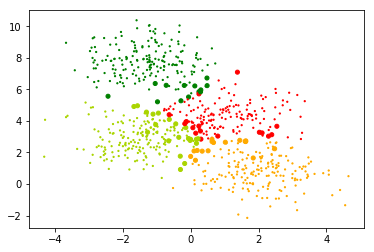

In [168]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_train, cmap=my_cmap, s=15*(np.abs(np.sign(Y_pred_train-Y_train))+.1))
plt.show()